Pima Indians Diabetes Dataset

Gözde Büyükyılmaz 21040101052 Bilgisayar Mühendisliği 3.sınıf

In [120]:
import pandas as pd
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [121]:
# 'veriseti.txt' dosyasını 'veriseti.csv' dosyasına dönüştürme
with open('veriseti.txt', 'r') as f:
    lines = f.readlines()

with open('veriseti.csv', 'w') as f:
    for line in lines:
        # Satırları boşluklarla böler ve virgülle birleştirir
        new_line = ','.join(line.split())
        f.write(new_line + '\n')

In [122]:
# Sütun adlarını tanımlayın
columns = [
    'Number of times pregnant', 
    'Plasma glucose concentration', 
    'Diastolic blood pressure', 
    'Triceps skinfold thickness', 
    '2-Hour serum insulin', 
    'Body mass index', 
    'Diabetes pedigree function', 
    'Age', 
    'Class'
]

# CSV dosyasını okuyun (ilk satırda sütun isimleri yoksa)
data = pd.read_csv('veriseti.csv', header=None)

# Sütun adlarını ekleyin
data.columns = columns

# DataFrame'i tekrar CSV dosyasına yazın (sütun isimleriyle birlikte)
data.to_csv('veriseti.csv', index=False)

print("Sütun isimleri başarıyla eklendi ve CSV dosyasına yazıldı.")

Sütun isimleri başarıyla eklendi ve CSV dosyasına yazıldı.


Soru1

In [123]:
# Sütun adlarını kontrol edelim
print(data.columns)

# Sınıf dağılımını görüntüler
print(data['Class'].value_counts())

# Özelliklerde sıfır değerlerinin sayısını kontrol edelim.
print((data == 0).sum())

# Sıfır değerlerini ortalama ile değiştirelim.
cols_with_zeros = ['Plasma glucose concentration', 'Diastolic blood pressure', 
                   'Triceps skinfold thickness', '2-Hour serum insulin', 
                   'Body mass index']

for col in cols_with_zeros:
    data[col] = data[col].replace(0, data[col].mean())

# Değişiklikleri kontrol edelim
print((data == 0).sum())

# Özellikleri ve sınıf değişkenini ayıralım
X = data.drop('Class', axis=1)
y = data['Class']

# Verileri ölçekleyelim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#// Eğitim ve test veri setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure', 'Triceps skinfold thickness',
       '2-Hour serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Age', 'Class'],
      dtype='object')
Class
0    500
1    268
Name: count, dtype: int64
Number of times pregnant        111
Plasma glucose concentration      5
Diastolic blood pressure         35
Triceps skinfold thickness      227
2-Hour serum insulin            374
Body mass index                  11
Diabetes pedigree function        0
Age                               0
Class                           500
dtype: int64
Number of times pregnant        111
Plasma glucose concentration      0
Diastolic blood pressure          0
Triceps skinfold thickness        0
2-Hour serum insulin              0
Body mass index                   0
Diabetes pedigree function        0
Age                               0
Class                           500
dtype: int64


2.Naive Bayes

Confusion Matrix:
[[120  31]
 [ 29  51]]
Accuracy: 0.74
Precision: 0.62
Recall: 0.64
F1 Score: 0.63
ROC-AUC Score: 0.72


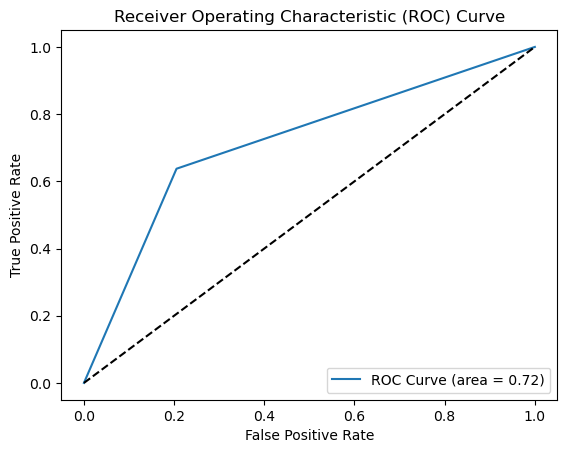

In [124]:
#Soru2
# Naive Bayes sınıflandırıcısını tanımlayalım
nb_classifier = GaussianNB()

# Eğitim veri setine Naive Bayes sınıflandırıcısını uygulayalım
nb_classifier.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapalım
y_pred = nb_classifier.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Diğer Değerlendirme Metrikleri
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix, modelin tahminlerinin nasıl dağıldığını gösterir.
True Negatives (TN): 120 (Modelin negatif olarak doğru sınıflandırdığı örnekler)
False Positives (FP): 29 (Modelin pozitif olarak yanlış sınıflandırdığı örnekler)
False Negatives (FN): 31 (Modelin negatif olarak yanlış sınıflandırdığı örnekler)
True Positives (TP): 51 (Modelin pozitif olarak doğru sınıflandırdığı örnekler)
Değerlendirme Metrikleri
Accuracy (Doğruluk): 0.74  Yani, model %75 doğruluk oranı ile çalışıyor.
Precision (Kesinlik): 0.62 Pozitif olarak sınıflandırdığı örneklerin %64'ü gerçekten pozitif.
Recall (Duyarlılık): 0.64  Pozitif olan örneklerin %69'unu doğru bir şekilde yakalamış.
F1 Score: 0.63             Precision ve Recall arasında bir denge sağlar.
ROC-AUC Score: 0.72
ROC eğrisinin altındaki alan. Modelin ayırma yeteneğini gösterir.
AUC değeri 0.72, modelin genel performansının iyi olduğunu gösterir.

3. K-En Yakın Komşuluk (KNN) Sınıflandırıcısı

En iyi k değeri: 11
Confusion Matrix:
[[128  23]
 [ 38  42]]
Accuracy: 0.74
Precision: 0.65
Recall: 0.53
F1 Score: 0.58
ROC-AUC Score: 0.69


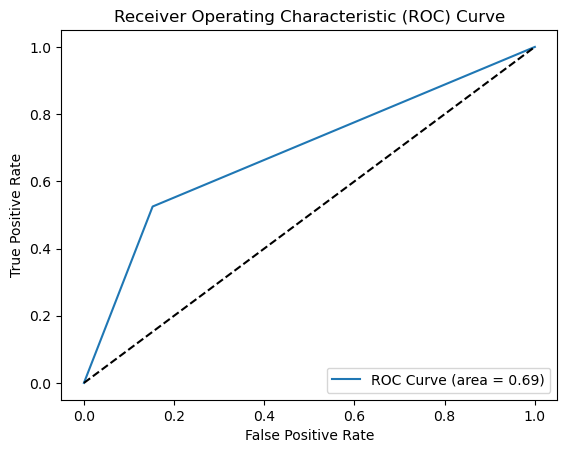

In [125]:
# K-en yakın komşuluk sınıflandırıcısını uygulama ve en iyi k değerini belirleme
param_grid = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
knn_predictions = best_knn.predict(X_test)
print(f"En iyi k değeri: {best_k}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, knn_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Diğer Değerlendirme Metrikleri
accuracy = accuracy_score(y_test, knn_predictions)
precision = precision_score(y_test, knn_predictions)
recall = recall_score(y_test, knn_predictions)
f1 = f1_score(y_test, knn_predictions)
roc_auc = roc_auc_score(y_test, knn_predictions)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, knn_predictions)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


En iyi k değeri: 11 GridSearchCV kullanılarak, 1'den 20'ye kadar olan k değerleri arasından en iyi sonucu veren k değeri 11 olarak belirlenmiş.
128: Doğru negatif, 38: Yanlış pozitif, 23: Yanlış negatif, 42: Doğru pozitif. Modelin genel doğruluğu %74. Bu, toplam örneklerin %74'sının doğru tahmin edildiğini gösterir. Precision: 0.65 Modelin pozitif tahminlerinin %65'inin doğru olduğunu gösterir. Recall: 0.53. Gerçek pozitiflerin %53'sının doğru tahmin edildiğini gösterir. F1 Score: 0.58. Precision ve Recall'un harmonik ortalaması, dengeli bir performans ölçüsü. ROC-AUC Score: 0.69. Modelin sınıflandırma yeteneğinin iyi olduğunu gösterir. 0.5 rastgele tahmin anlamına gelirken, 1 mükemmel sınıflandırma yeteneği anlamına gelir.ROC eğrisinin altındaki alan (AUC) 0.69, modelin iyi bir ayrıştırma yeteneğine sahip olduğunu gösterir.

4. Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM) Sınıflandırıcıları

Multi-Layer Perceptron (MLP) Sınıflandırıcısı
Konfüzyon Matrisi:
[[116  35]
 [ 35  45]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       151
           1       0.56      0.56      0.56        80

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231

AUC Değeri: 0.75


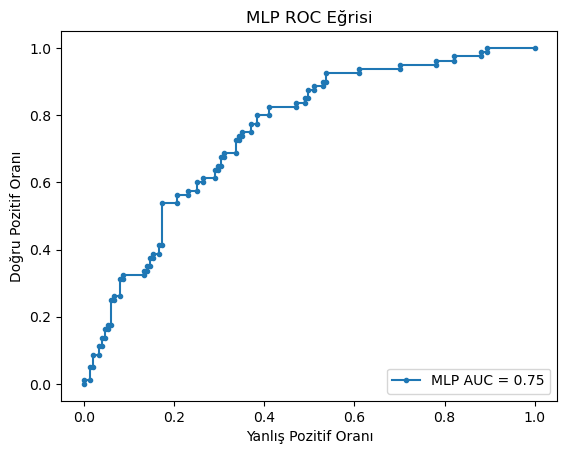

In [126]:
# 3. MLP modelinin eğitilmesi
mlp_model = MLPClassifier(max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapılması
y_pred_mlp = mlp_model.predict(X_test)
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Sonuçların raporlanması
print("Multi-Layer Perceptron (MLP) Sınıflandırıcısı")
print("Konfüzyon Matrisi:")
print(confusion_matrix(y_test, y_pred_mlp))
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_mlp))

# ROC Eğrisi ve AUC değeri
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
auc_value_mlp = roc_auc_score(y_test, y_prob_mlp)
print(f"AUC Değeri: {auc_value_mlp:.2f}")

plt.figure()
plt.plot(fpr_mlp, tpr_mlp, marker='.', label=f'MLP AUC = {auc_value_mlp:.2f}')
plt.title('MLP ROC Eğrisi')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.legend(loc='lower right')
plt.show()

Konfüzyon Matrisi:
Doğru Negatif: 151 örneğin 116'sı doğru bir şekilde sınıflandırılmıştır.
Doğru Pozitif: 80 örneğin 45'i doğru bir şekilde sınıflandırılmıştır.
Ancak, her iki sınıf için de yanlış sınıflandırılan örnekler mevcuttur.
Sınıflandırma Raporu:
Precision (Hassasiyet): Sınıf 0 için %77, sınıf 1 için %56'dır. Yani, modelimiz sınıf 0'ı tahmin ederken daha hassas davranmıştır.
Recall (Duyarlılık): Sınıf 0 için %77, sınıf 1 için %56'dır. Modelimiz her iki sınıfı da eşit derecede hatırlama yeteneği gösterdiği görülüyor.
F1-score: Sınıf 0 için 0.77, sınıf 1 için 0.56'dır. F1-score, precision ve recall arasındaki dengeyi sağlayan bir metriktir.
Accuracy (Doğruluk): %70'tir. Modelin doğru tahmin ettiği örneklerin oranını ifade eder.
AUC Değeri:
AUC değeri 0.75 olarak raporlanmıştır. Bu, modelinizin sınıflar arası ayrım yeteneğinin iyi olduğunu göstermekte.

Support Vector Machines (SVM) Sınıflandırıcısı
SVM Confusion Matrix:
 [[126  25]
 [ 34  46]]
SVM Accuracy:  0.7445887445887446
SVM Precision:  0.647887323943662
SVM Recall:  0.575
SVM F1 Score:  0.609271523178808
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

SVM AUC Değeri: 0.80


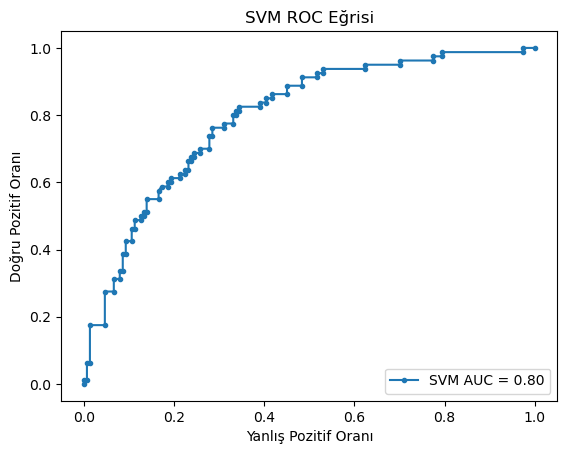

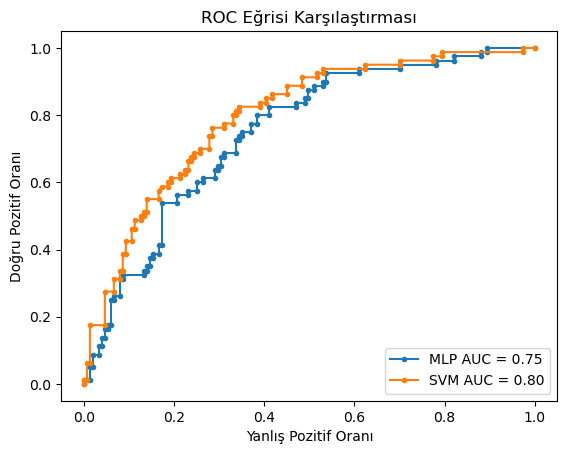

In [128]:
# 4. SVM modelini oluşturun ve eğitin
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# SVM tahminleri
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# Sonuçları raporlayın
print("Support Vector Machines (SVM) Sınıflandırıcısı")
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("SVM Precision: ", precision_score(y_test, y_pred_svm))
print("SVM Recall: ", recall_score(y_test, y_pred_svm))
print("SVM F1 Score: ", f1_score(y_test, y_pred_svm))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_svm))

# ROC Eğrisi ve AUC değeri
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
auc_value_svm = roc_auc_score(y_test, y_prob_svm)
print(f"SVM AUC Değeri: {auc_value_svm:.2f}")

plt.figure()
plt.plot(fpr_svm, tpr_svm, marker='.', label=f'SVM AUC = {auc_value_svm:.2f}')
plt.title('SVM ROC Eğrisi')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.legend(loc='lower right')
plt.show()

# Her iki modelin ROC eğrilerini tek bir grafikte gösterme
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, marker='.', label=f'MLP AUC = {auc_value_mlp:.2f}')
plt.plot(fpr_svm, tpr_svm, marker='.', label=f'SVM AUC = {auc_value_svm:.2f}')
plt.title('ROC Eğrisi Karşılaştırması')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.legend(loc='lower right')
plt.show()


Konfüzyon Matrisi (Confusion Matrix):
Gerçek sınıfı 0 olan 151 örneğin 126'sı doğru bir şekilde sınıflandırılmıştır.
Gerçek sınıfı 1 olan 80 örneğin 46'sı doğru bir şekilde sınıflandırılmıştır.
Ancak, her iki sınıf için de yanlış sınıflandırılan örnekler mevcuttur.
Doğruluk (Accuracy): %74.46 olarak hesaplanmıştır. Modelin doğru tahmin ettiği örneklerin oranını ifade eder.
Hassasiyet (Precision):
Sınıf 0 için precision değeri %79, yani modelin sınıf 0'ı doğru tahmin etme yeteneği yüksektir.
Sınıf 1 için precision değeri %65, yani modelin sınıf 1'i doğru tahmin etme yeteneği daha düşüktür.
Duyarlılık (Recall):
Sınıf 0 için recall değeri %83, yani gerçekten sınıf 0'a ait olan örneklerin %83'ünü model doğru bir şekilde sınıflandırmıştır.
Sınıf 1 için recall değeri %57, yani gerçekten sınıf 1'e ait olan örneklerin yalnızca %57'sini model doğru bir şekilde sınıflandırmıştır.
F1 Skoru (F1 Score):
Sınıf 0 için F1 skoru 0.81, sınıf 1 için F1 skoru 0.61'dir. F1 skoru, precision ve recall arasındaki dengeyi sağlayan bir metriktir.
AUC Değeri:
AUC değeri 0.80 olarak raporlanmıştır. Bu, modelin sınıflar arası ayrım yeteneğinin iyi olduğunu gösterir.

"MLP, Accuracy (doğruluk) açısından 0.70 puan elde ederken, Precision (kesinlik) ve Recall (hatırlama) açısından sırasıyla 0.56 ve 0.56 puan almıştır. F1 Score (F1 Skoru) değeri ise 0.56'dır. ROC-AUC Skoru 0.72'dir. MLP (CSV), Accuracy açısından 0.74 puan alarak en yüksek performansı gösterirken, Precision, Recall ve F1 Score sırasıyla 0.65, 0.53 ve 0.58 puan almıştır. ROC-AUC Skoru 0.69'dur. SVM, Accuracy açısından da 0.74 puan alarak MLP (CSV) ile aynı doğruluğa sahiptir. Precision, Recall ve F1 Score sırasıyla 0.65, 0.57 ve 0.61 puan almıştır. ROC-AUC Skoru ise 0.80'dir. SVM, ROC-AUC Skoru açısından diğerlerinden belirgin şekilde daha yüksek performans sergilemektedir."